## Урок 3. Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных

### Задача 1

#### Даны значения зарплат из выборки выпускников:
#### 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.
#### Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.
#### Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [87]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

In [88]:
money = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])
df['salary'] = pd.DataFrame(money)

In [89]:
print (f'среднее арифметическое: {df["salary"].sum()/df["salary"].count()}')

среднее арифметическое: 65.3


In [90]:
print(f'среднее квадратичное отклонение: {np.sqrt(((df["salary"] - df["salary"].mean()) ** 2).sum() / df["salary"].count())}')

среднее квадратичное отклонение: 30.823854398825596


In [91]:
print(f'смещенная дисперсия: {((df["salary"] - df["salary"].mean()) ** 2).sum() / df["salary"].count()}')

смещенная дисперсия: 950.11


In [92]:
print(f'несмещенная дисперсия: {((df["salary"] - df["salary"].mean()) ** 2).sum() / (df["salary"].count()-1)}')

несмещенная дисперсия: 1000.1157894736842


In [93]:
print (f'среднее арифметическое: {df["salary"].mean()}')
print (f'среднее квадратичное отклонение: {df["salary"].std(ddof=0)}')
print (f'смещенная дисперсия: {df["salary"].var(ddof=0)}')
print (f'несмещенная дисперсия: {df["salary"].var(ddof=1)}')

среднее арифметическое: 65.3
среднее квадратичное отклонение: 30.823854398825596
смещенная дисперсия: 950.11
несмещенная дисперсия: 1000.1157894736842


### Задача 2

#### Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [94]:
q1 = df["salary"].quantile(0.25)
q3 = df["salary"].quantile(0.75)
iqr = q3 - q1
print(f'первый квартиль: {q1}\nтретий квартиль: {q1}\nинтерквартильное расстояние: {iqr}')

первый квартиль: 42.0
третий квартиль: 42.0
интерквартильное расстояние: 39.0


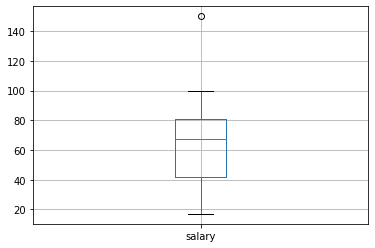

In [95]:
df[["salary"]].boxplot()

In [96]:
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-16.5, 139.5)

In [98]:
outliers = df.loc[(df['salary'] < boxplot_range[0]) | (df['salary'] > boxplot_range[1])]
outliers.shape[0]

1

In [100]:
print(f'Доля выбросов: {outliers.shape[0] / df.shape[0]}')

Доля выбросов: 0.05


### Задача 3

#### В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

In [104]:
#по классическому определению вероятности:
# факультет A = 1/4
# факультет B = 1/4
# факультет C = 1/2
# 1/4+1/4+1/2 = 1 

# по формуле полной вероятности:
P = 1/4 * 0.8 + 1/4 * 0.7 + 1/2 * 0.9

# по Байесу получаем:
print (f'Факультет А: {(1/4 * 0.8) / P}')
print (f'Факультет B: {(1/4 * 0.7) / P}')
print (f'Факультет C: {(1/2 * 0.9) / P}')

Факультет А: 0.24242424242424246
Факультет B: 0.21212121212121213
Факультет C: 0.5454545454545455
